### Code réalisé par Robin Mathelier en marge du livre "Hands-on Machine Learning with Scikit-Learn and Tensorflow" (O'Reilly, 2017) d'Aurélien Géron

In [1]:
import os
os.chdir('C:/Users/robin/Dropbox/Datasets')
os.getcwd()

import tarfile

from six.moves import urllib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib

import numpy as np
import numpy.linalg as alg

from scipy.ndimage import interpolation

import sklearn.linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

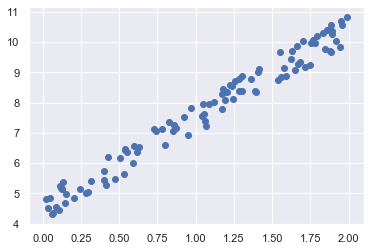

In [2]:
X = 2 * np.random.rand(100,1)
X
y = 4 + 3*X + np.random.rand(100,1)
plt.scatter(X,y)

In [3]:
X_b = np.concatenate((np.ones((100,1)), X), axis = 1)
alg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 1.62290088],
       [1.        , 1.89137143],
       [1.        , 1.40767461],
       [1.        , 0.01735925],
       [1.        , 1.78334234],
       [1.        , 1.06945013],
       [1.        , 0.53528348],
       [1.        , 1.23843691],
       [1.        , 1.66334455],
       [1.        , 1.36316765],
       [1.        , 0.5343526 ],
       [1.        , 1.19056336],
       [1.        , 1.1818796 ],
       [1.        , 1.30295267],
       [1.        , 0.28532683],
       [1.        , 0.12441505],
       [1.        , 0.4278466 ],
       [1.        , 1.25770983],
       [1.        , 0.08836575],
       [1.        , 1.11979743],
       [1.        , 1.70372354],
       [1.        , 0.7808473 ],
       [1.        , 0.92636955],
       [1.        , 0.41269195],
       [1.        , 1.75144937],
       [1.        , 1.17203869],
       [1.        , 1.55924035],
       [1.        , 1.84385325],
       [1.        , 0.86813238],
       [1.        , 0.04897257],
       [1.

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51947276]), array([[3.01686836]]))

In [5]:
eta = 0.1
n_iteration = 1000
m = 100

In [6]:
theta = np.random.randn(2,1)
theta

array([[-0.31721936],
       [-0.9072289 ]])

In [7]:
def plot_gradient_descent(eta, theta_path=None) :
    theta = np.random.randn(2,1)
    for iteration in range(n_iteration) :
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient
        if iteration <10 :
            y_pred = []
            for x in X_b :
                y_pred += [theta.T.dot(x)]
            y_pred = np.array(y_pred)
            plt.axis([0, 2, 0, 15])
            plt.plot(X, y_pred, color = 'r')
            plt.scatter(X, y, s = 5)


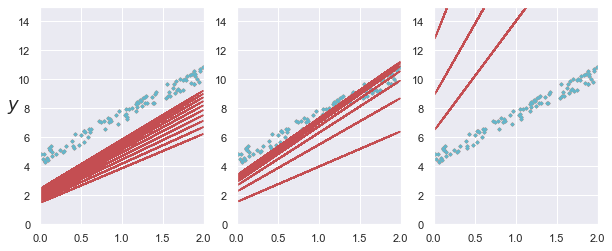

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(eta=0.1)
plt.subplot(133); plot_gradient_descent(eta=0.5)

In [9]:
n_epoques = 50
t0,t1 = 5,50

def learning_schedule(t) :
    return t0 / (t + t1)

theta = np.random.randn(2,1)
theta

array([[-1.87095427],
       [ 0.74715418]])

In [10]:
list_theta = []
for epoque in range(n_epoques) :
    for i in range(m) :
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradient = (2/m) * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoque * m + i)
        theta = theta - eta*gradient
        list_theta += [theta]
print(theta)

[[0.70805774]
 [3.48322461]]


In [11]:
L = [list_theta[i] for i in range(0,5000, 10)]

In [12]:
len(L)

500

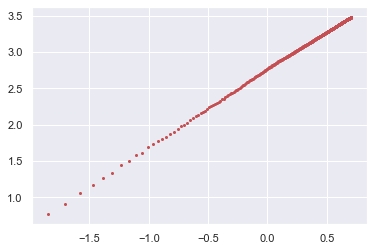

In [13]:
theta0_SGD = [L[i][0] for i in range(len(L))]
theta0_SGD
theta1_SGD = [L[i][1] for i in range(len(L))]
plt.scatter(theta0_SGD, theta1_SGD, s=4, color = 'r')

In [14]:
X.shape, theta.shape

((100, 1), (2, 1))

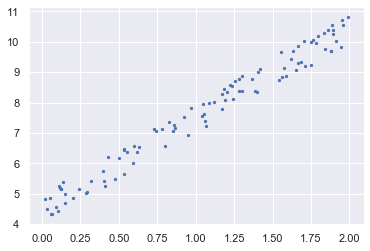

In [15]:
L1 = [list_theta[i] for i in range(5)]
theta0_SGD1 = np.array([L[i][0] for i in range(len(L))])
theta1_SGD1 = np.array([L[i][1] for i in range(len(L))])
plt.scatter(X,y, s=5)
for i in range(len(L1)) :
    theta_test = np.concatenate((theta0_SGD1,theta1_SGD1))
    y_test = X.dot(theta_test.T)
    #plt.plot(X,y_test,color = 'r')

In [16]:
### Regression polynomiale

In [17]:
m = 100
X = 6*np.random.rand(m,1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

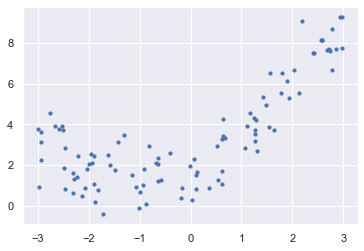

In [18]:
plt.scatter(X,Y,s=10)

In [19]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_

(array([1.84345775]), array([[1.0081157 , 0.48592572]]))

In [21]:
c = lin_reg.intercept_[0]
nb = lin_reg.coef_[0]
b = nb[0]
a = nb[1]
a,b

(0.48592571922830957, 1.0081157035986217)

In [22]:
y_predict = a*X**2 + b*X + c

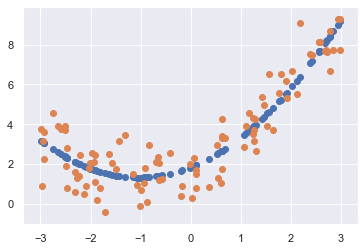

In [23]:
plt.scatter(X,y_predict)
plt.scatter(X,Y)

In [24]:
def plot_learning_curves(model, X, y) :
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(2, len(X_train)) :
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors))
    plt.plot(np.sqrt(val_errors))

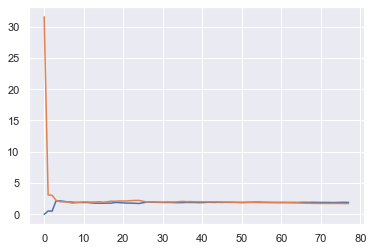

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [26]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
('lin_reg', LinearRegression())])

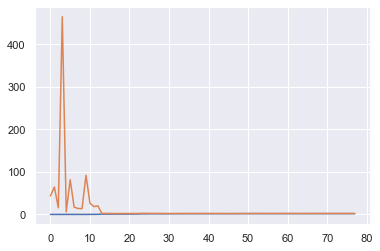

In [27]:
plot_learning_curves(polynomial_regression, X,y)

In [28]:
###   log_reg

In [29]:
iris = datasets.load_iris()

In [30]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
X = iris['data'][:,3:]

In [32]:
y = (iris['target'] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

Text(0, 0.5, 'probabilité')

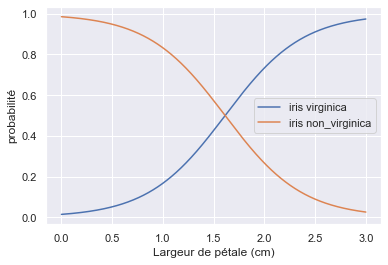

In [35]:
plt.plot(X_new, y_proba[:,1], label = 'iris virginica')
plt.plot(X_new, y_proba[:,0], label = 'iris non_virginica')
plt.legend()
plt.xlabel('Largeur de pétale (cm)')
plt.ylabel('probabilité')

In [36]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [37]:
###   SVM

In [38]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [39]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
X_length = iris['data'][:,2]
X_width = iris['data'][:,3:]

In [42]:
X_width.shape, X_length.shape

((150, 1), (150,))

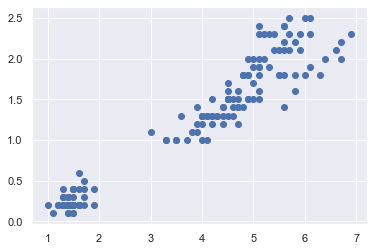

In [43]:
plt.scatter(X_length, X_width)

In [44]:
X_length_setosa = []
X_width_setosa = []
for i in range(150) :
    if iris['target'][i] == 0 :
        X_length_setosa.append(X_length[i])
        X_width_setosa.append(X_width[i])

In [45]:
X_length_versicolor = []
X_width_versicolor = []
for i in range(150) :
    if iris['target'][i] == 1 :
        X_length_versicolor.append(X_length[i])
        X_width_versicolor.append(X_width[i])

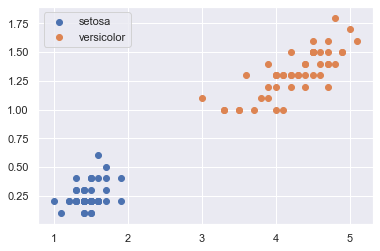

In [46]:
plt.scatter(X_length_setosa,X_width_setosa, label = 'setosa')
plt.scatter(X_length_versicolor,X_width_versicolor, label = 'versicolor')
plt.legend()

In [47]:
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [48]:
svm_clf = Pipeline([
    ('scaler' , StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss = 'hinge'))
])

In [49]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [50]:
svm_clf.predict([[5.5 , 1.7]])

array([1.])

In [51]:
make_moons = datasets.make_moons()

In [52]:
label = make_moons[1]

In [53]:
data= make_moons[0]

In [54]:
X_0_0 = []
X_0_1 = []
X_1_0 = []
X_1_1 = []
for i in range(label.shape[0]) :
    if label[i] == 1 :
        X_1_0.append(data[i][0])
        X_1_1.append(data[i][1])
    else : 
        X_0_0.append(data[i][0])
        X_0_1.append(data[i][1])        

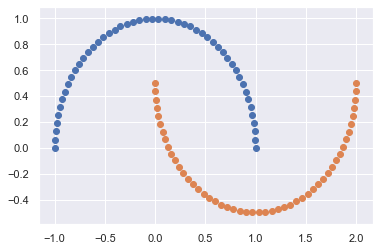

In [55]:
plt.scatter(X_0_0, X_0_1)
plt.scatter(X_1_0, X_1_1)

In [56]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly' , degree = 3, coef0 = 1, C=5))
])

In [57]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [58]:
X = iris['data'][:,2:]
y = y = (iris['target'] == 2).astype(np.float64)

In [59]:
lin_svc = LinearSVC()

In [60]:
lin_svc.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [61]:
lin_svc.coef_

array([[0.28015302, 1.70097505]])

In [62]:
a = lin_svc.coef_[0][0]
b = lin_svc.coef_[0][1]
a,b

(0.28015301659480435, 1.7009750501983762)

In [63]:
c = lin_svc.intercept_[0]
c

-4.171109198572509

In [ ]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

In [ ]:
plt.scatter(X_length_setosa,X_width_setosa, label = 'setosa')
plt.scatter(X_length_versicolor,X_width_versicolor, label = 'versicolor')
plt.legend()

In [ ]:
abs = np.linspace(0.5,5.5, 100)
ord = np.linspace(0.5,5.5, 100)
ord = np.array([a * x + c for x in abs])

In [ ]:
plt.scatter(X_length_setosa,X_width_setosa, label = 'setosa')
plt.scatter(X_length_versicolor,X_width_versicolor, label = 'versicolor')
plt.plot(abs,ord)
plt.legend()

In [ ]:
plot_svc_decision_boundary(svm_clf, xmin = 0.5, xmax = 6)

In [ ]:
mnist_train = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_train.csv')
mnist_test = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_test.csv')

In [ ]:
X_train = mnist_train.drop('label',axis = 1)
y_train = mnist_train['label']
X_test = mnist_test.drop('label',axis = 1)
y_test = mnist_test['label']

In [ ]:
svm_clf = SVC()

In [ ]:
svm_clf.fit(X_train,y_train)